# Sove a maximum problem with Lagrange Multiplier

[Lagrange multiplier - Wikipedia](https://en.wikipedia.org/wiki/Lagrange_multiplier)

## objective function
$$f(x, y) = x y $$

## constraint
$$g(x,y) = \frac{x^2}{a^2} + \frac{y^2}{b^2} - 1$$

## Lagrangian function
$$L(x, \lambda) = x y - \lambda (\frac{x^2}{a^2} + \frac{y^2}{b^2} - 1) $$

## derivatives 
$$ \frac{\partial L}{\partial x} = y - (2λx / a^2) = 0$$
$$ \frac{\partial L}{\partial y} = x - (2λy / b^2) = 0$$
$$\frac{\partial L}{\partial \lambda} = - g(x, y) = 0$$

## solution
$$(x, y) = (\frac{a}{\sqrt{2}}, \frac{b}{\sqrt{2}}) $$

# Illustrate grad(f) = lambda * grad(g)

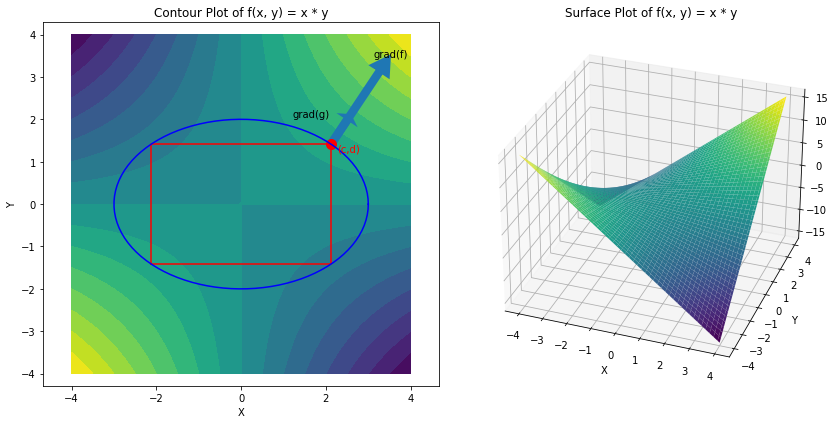

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the range of x and y values
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
a, b = 3, 2

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the values of the function f(x, y) = x * y
Z = X * Y

# Create subplots
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# solution of maximum problem (x,y)=(c, d)
c = a/np.sqrt(2)
d = b/np.sqrt(2)
rectangle_x = [-c, c, c, -c, -c]
rectangle_y = [-d, -d, d, d, -d]

# Calculate the x and y coordinates of the ellipse
theta = np.linspace(0, 2*np.pi, 100)
ellipse_x = a * np.cos(theta)
ellipse_y = b * np.sin(theta)

# grad(f) at (x,y)=(c,d)
grad_f_x, grad_f_y = d, c
grad_f = patches.Arrow(c, d, grad_f_x, grad_f_y)

# grad(g) at (x,y)=(c,d)
grad_g_x, grad_g_y = 2*c/(a**2), 2*d/(b**2)
grad_g = patches.Arrow(c, d, grad_g_x, grad_g_y)

# Plot the contour plot in the first subplot
ax1.contourf(X, Y, Z, levels=20, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Contour Plot of f(x, y) = x * y')

# plot a rectangle
ax1.plot(rectangle_x, rectangle_y, 'r', label='Rectangle')

# plot the constraint
ax1.plot(ellipse_x, ellipse_y, 'b', label='Ellipse')

# plot the grad(f) @ (x, y) = (c, d)
ax1.add_patch(grad_f) 
ax1.text(c + grad_f_x , d + grad_f_y, s='grad(f)', ha='center', va='center')

# plot the grad(g) @ (x, y) = (c, d)
ax1.add_patch(grad_g) # grad(g) @ (c,d)
ax1.text(c - grad_g_x , d + grad_g_y, s='grad(g)', ha='center', va='center')

# plot the solution
ax1.scatter(c, d, s=100, color='red') # solution(c,d)
ax1.text(c+0.4, d-0.1, s='(c,d)', color='red', ha='center', va='center')

ax1.axis('equal')


# Plot the surface plot in the second subplot
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.view_init(elev=30, azim=-70)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Surface Plot of f(x, y) = x * y')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()